In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #high level visualisation python libary linked with matplotlib

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas.util.testing as tm
import tensorflow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
filenames= os.listdir('/content/drive/My Drive/dogcat/train/train')
categories=[]
for filename in filenames:
    category = filename.split('.')[0]
    if category== 'dog':
        categories.append('dog')
    else:
        categories.append('cat')
df= pd.DataFrame(
{
    'filename':filenames,
    'category':categories
})

In [7]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [8]:
df.head()

,filename,category
0,cat.912.jpg,cat
1,cat.91.jpg,cat
2,cat.9096.jpg,cat
3,cat.9118.jpg,cat
4,cat.908.jpg,cat


In [9]:
df['category'].value_counts()

cat    12500
dog    12500
Name: category, dtype: int64

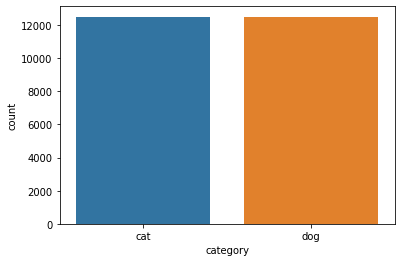

In [10]:
sns.countplot(x='category',data= df)

In [0]:
filenames[0]

In [0]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/My Drive/dogcat/train/train/'+filenames[0])
plt.imshow(img)

In [0]:
test_image= image.load_img('/content/drive/My Drive/dogcat/train/train/'+filenames[0], target_size=(128,128))
test_image=image.img_to_array(test_image)
plt.imshow(test_image[:,:,2])

In [0]:
print(test_image)

In [0]:
from sklearn.model_selection import train_test_split
train_data , val_data = train_test_split(df,test_size=0.20,random_state=42)
train_data = train_data.reset_index(drop = True)
val_data = val_data.reset_index(drop = True)


In [12]:
train_data.head()

,filename,category
0,dog.1118.jpg,dog
1,dog.1145.jpg,dog
2,cat.8201.jpg,cat
3,cat.10133.jpg,cat
4,cat.8693.jpg,cat


In [13]:
train_data['category'].value_counts()

cat    10014
dog     9986
Name: category, dtype: int64

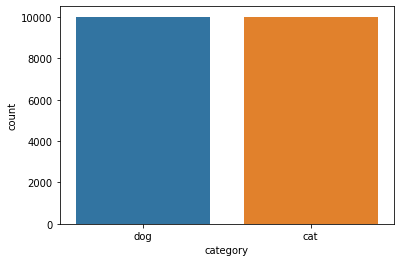

In [14]:
sns.countplot(x='category', data=train_data)

In [0]:

from tensorflow import keras

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, BatchNormalization
from keras.layers import Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [23]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 4s 0us/step


In [24]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
model = tf.keras.Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [26]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [0]:
for layer in model.layers:
  layer.trainable=False

In [0]:
model.add(tensorflow.keras.layers.Dense(2,activation = 'softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [0]:
model.save('dogscats.h5')

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range = 0.2, zoom_range=0.2,horizontal_flip=True)
train_generator = train_datagen.flow_from_dataframe(
                train_data,
                '/content/drive/My Drive/dogcat/train/train',
                x_col='filename',
                y_col= 'category',
                target_size=(224, 224),
                batch_size=32,
                class_mode='categorical')

Found 20000 validated image filenames belonging to 2 classes.


In [35]:
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
                val_data,
                '/content/drive/My Drive/dogcat/train/train',
                x_col='filename',
                y_col= 'category',
                target_size=(224, 224),
                batch_size=32,
                class_mode='categorical')

Found 5000 validated image filenames belonging to 2 classes.


In [0]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss',mode='min',patience=30,verbose=1)
mc = ModelCheckpoint('dogscats.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only = True)

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit_generator(train_generator,
                                  steps_per_epoch=625,
                                  epochs=50,
                                  validation_data=val_generator,
                                  validation_steps=200,
                                  callbacks=[es,mc])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
625/625 [==============================] - ETA: 0s - loss: 0.3715 - accuracy: 0.8328 

In [0]:
model.save('best_model.h5')

In [0]:
history.history

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.ylabel('Change of accuracy over epochs')
plt.title(['accuracy','val_accuracy'])
plt.show()

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.ylabel('Change of Loss over epochs')
plt.title(['loss','val_loss'])
plt.show()

In [0]:
train_generator.class_indices

In [0]:
from zipfile import ZipFile
zf = ZipFile('../input/dogs-vs-cats/test1.zip','r')
zf.extractall('../kaggle/working/Temp')
zf.close()

In [0]:
print(os.listdir('../kaggle/working/Temp/test1'))

In [0]:
filenames=os.listdir('../kaggle/working/Temp/test1')
test_data=pd.DataFrame({
    'filename':filenames
})

In [0]:
from keras.models import load_model
saved_model = load_model('best_model.h5')


In [0]:
img = image.load_img('../kaggle/working/Temp/test1/'+filenames[29])

test_image = image.load_img("../kaggle/working/Temp/test1/"+filenames[29],target_size=(128,128))

test_image = image.img_to_array(test_image)
plt.imshow(img)
test_image = np.expand_dims(test_image, axis = 0)
result = saved_model.predict(test_image)
print(np.argmax(result,axis=1))



In [0]:
test_datagen = ImageDataGenerator(rescale= 1./255)
test_generator = test_datagen.flow_from_dataframe(
    test_data,
    '../kaggle/working/Temp/test1/',
    x_col='filename',
    y_col=None,
    target_size=(128,128),
    batch_size=32,
    class_mode=None
)

In [0]:
predict= saved_model.predict_generator(test_generator)
final_prediction= np.argmax(predict,axis=1)

In [0]:
predict_df = pd.DataFrame(final_prediction,columns =['label'])
submission_df= test_data.copy()
submission_df['id']=(submisssion_df['filename'].str.split('.').str[0].astype(int)
submission_df = pd.concat([submisiion_df,predict_df],axis=1)
submission_df = submission_df.drop(['filename'],axis=1)
submission_df = submission_df.sort_values(by=['id'])
submission_df = submission_df.reset_index(drop=True)
submission_df.to_csv('submission.csv', index=False)
                     